# Archisha Sinha
# MBA Tech AI


## Domain: Recommendation System
## Topic: Exploratory Data Analysis for Book Recommendation System

In this project, we will use Goodreads dataset. The dataset was originally scraped from the Goodreads API in September 2017 by Zygmunt Zając and updated by Olivier Simard-Hanley.

This dataset consist of 5 files which are:
- ratings.csv: contains user ratings for books they read
- books_enriched.csv: contains metadata for each book (book ID, title, authors, year
published, etc)
- to-read.csv: contains books marked &quot;to read&quot; by users
- book_tag.csv: contains tags/shelves/genres assigned by users to books
- tag.csv: contains the tag names corresponding to the tag ids in book_tag.csv

For this experiment we are taking user ratings (ratings.csv) and metadata of the
books(books_enriched.csv).

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the datasets
ratings_df = pd.read_csv('/content/drive/MyDrive/Archisha- Semester 7/AA-Labs/RS/ratings.csv')
books_enriched_df = pd.read_csv('/content/drive/MyDrive/Archisha- Semester 7/AA-Labs/RS/books_enriched.csv')

## Performing EDA for USER RATINGS

1. Total Ratings

In [4]:
total_ratings = ratings_df.shape[0]
print(f"Total ratings: {total_ratings}")

Total ratings: 5976479


2. Total Users

In [5]:
total_users = ratings_df['user_id'].nunique()
print(f"Total users: {total_users}")

Total users: 53424


3. Total Books

In [6]:
total_books = ratings_df['book_id'].nunique()
print(f"Total books: {total_books}")

Total books: 10000


4. Maximum and Minimum Rating

In [7]:
max_rating = ratings_df['rating'].max()
min_rating = ratings_df['rating'].min()
print(f"Maximum rating: {max_rating}")
print(f"Minimum rating: {min_rating}")

Maximum rating: 5
Minimum rating: 1


5. Total Columns in books_enriched.csv

In [8]:
total_columns = books_enriched_df.shape[1]
print(f"Total columns in books_enriched.csv: {total_columns}")

Total columns in books_enriched.csv: 30


6. Anything noticeable in books dataset?

In [9]:
# Displaying first 5 rows to visually inspect
print(books_enriched_df.head(5))

   Unnamed: 0  index                            authors  average_rating  \
0           0      0                ['Suzanne Collins']            4.34   
1           1      1  ['J.K. Rowling', 'Mary GrandPré']            4.44   
2           2      2                ['Stephenie Meyer']            3.57   
3           3      3                     ['Harper Lee']            4.25   
4           4      4            ['F. Scott Fitzgerald']            3.89   

   best_book_id  book_id  books_count  \
0       2767052        1          272   
1             3        2          491   
2         41865        3          226   
3          2657        4          487   
4          4671        5         1356   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edi

In [10]:
# Checking for missing values
missing_values = books_enriched_df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
Unnamed: 0                     0
index                          0
authors                        0
average_rating                 0
best_book_id                   0
book_id                        0
books_count                    0
description                   57
genres                         0
goodreads_book_id              0
image_url                      0
isbn                         700
isbn13                       585
language_code                  0
original_publication_year     21
original_title               585
pages                         73
publishDate                    8
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
ratings_count                  0
small_image_url                0
title                          0
work_id                        0
work_ratings_count             0
work_text_reviews_count        0
authors_2   

In [11]:
# Checking data types
data_types = books_enriched_df.dtypes
print(f"Data types of each column:\n{data_types}")

Data types of each column:
Unnamed: 0                     int64
index                          int64
authors                       object
average_rating               float64
best_book_id                   int64
book_id                        int64
books_count                    int64
description                   object
genres                        object
goodreads_book_id              int64
image_url                     object
isbn                          object
isbn13                       float64
language_code                 object
original_publication_year    float64
original_title                object
pages                        float64
publishDate                   object
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
ratings_count                  int64
small_image_url               object
title                         object
work_id    

In [12]:
# Displaying last 5 rows to visually inspect
print(books_enriched_df.tail(5))

      Unnamed: 0  index                                            authors  \
9995        9995   9980                               ['[Jeffery Deaver]']   
9996        9996   9981                           ['[Karen Marie Moning]']   
9997        9997   9984  ['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...   
9998        9998   9986                                ['[Iris Johansen]']   
9999        9999   9999                                  ['[John Keegan]']   

      average_rating  best_book_id  book_id  books_count  \
9995            3.98        106312     9981           58   
9996            4.18      12444298     9982            1   
9997            3.69         19688     9985           24   
9998            4.12       8087038     9987           29   
9999            4.00          8914    10000           31   

                                            description  \
9995  A high-school girl in Harlem, Geneva Settle, i...   
9996  In Karen Marie Moning’s latest installment of 

7. Statistical Summary

In [13]:
stat_summary = books_enriched_df.describe(include='all')
print(stat_summary)

         Unnamed: 0         index           authors  average_rating  \
count   10000.00000  10000.000000             10000    10000.000000   
unique          NaN           NaN              5057             NaN   
top             NaN           NaN  ['Stephen King']             NaN   
freq            NaN           NaN                58             NaN   
mean     4999.50000   4526.324400               NaN        4.002191   
std      2886.89568   2567.923711               NaN        0.254427   
min         0.00000      0.000000               NaN        2.470000   
25%      2499.75000   2351.750000               NaN        3.850000   
50%      4999.50000   4567.500000               NaN        4.020000   
75%      7499.25000   6661.250000               NaN        4.180000   
max      9999.00000   9999.000000               NaN        4.820000   

        best_book_id      book_id   books_count  \
count   1.000000e+04  10000.00000  10000.000000   
unique           NaN          NaN           N

8. Univariate Analysis

<ipython-input-14-60282306f335>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')


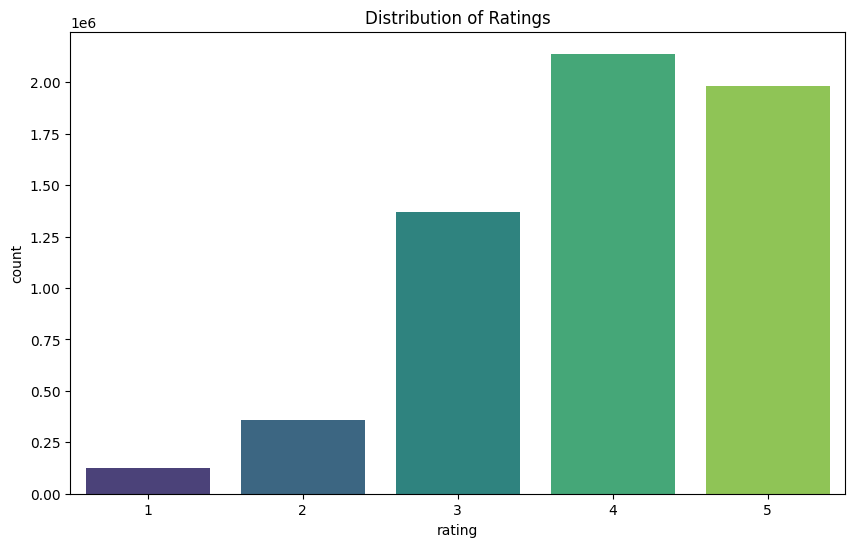

In [14]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

9. Bivariate Analysis

<ipython-input-15-d798610df25e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='user_id', data=ratings_df, palette='viridis')


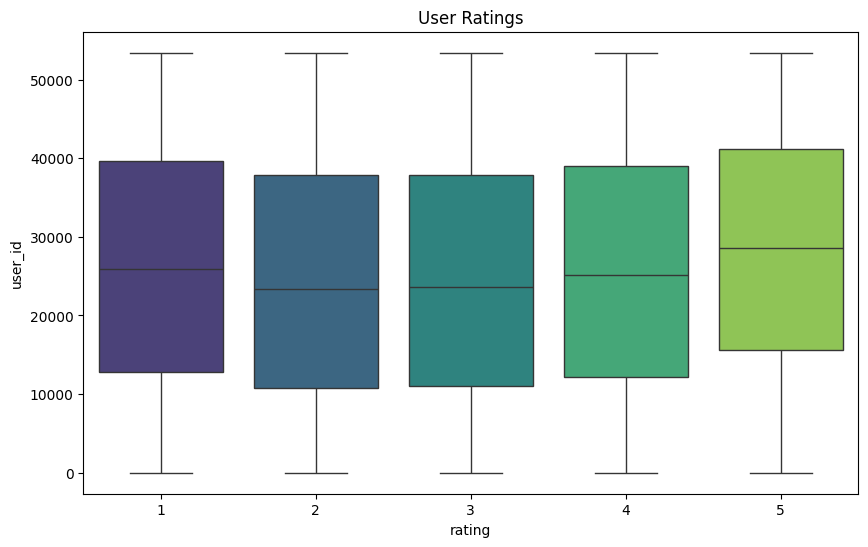

In [15]:
# Relationship between user_id and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='user_id', data=ratings_df, palette='viridis')
plt.title('User Ratings')
plt.show()

<ipython-input-16-f46df9e0f332>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='book_id', data=ratings_df, palette='viridis')


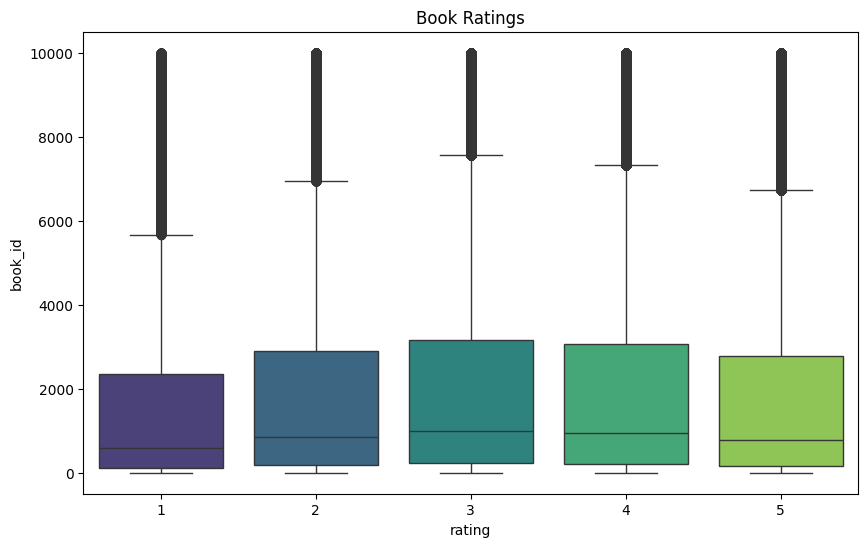

In [16]:
# Relationship between book_id and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='book_id', data=ratings_df, palette='viridis')
plt.title('Book Ratings')
plt.show()

11. How is the rating for all books distributed?

<ipython-input-17-70f79cd3d226>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ratings_df['rating'], bins=5, kde=True, palette='viridis')


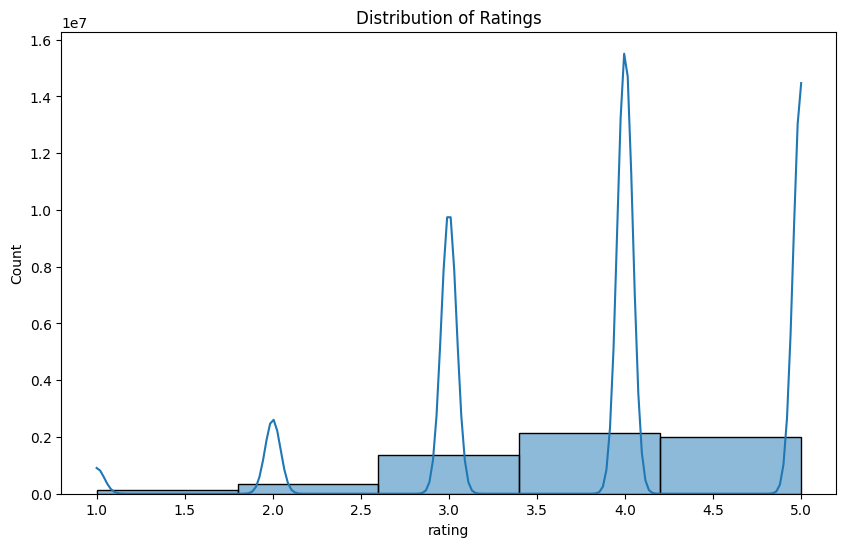

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=5, kde=True, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

12. How is the average rating per user distributed?


<ipython-input-18-b4ad3f9a8472>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(user_avg_rating, kde=True, palette='viridis')


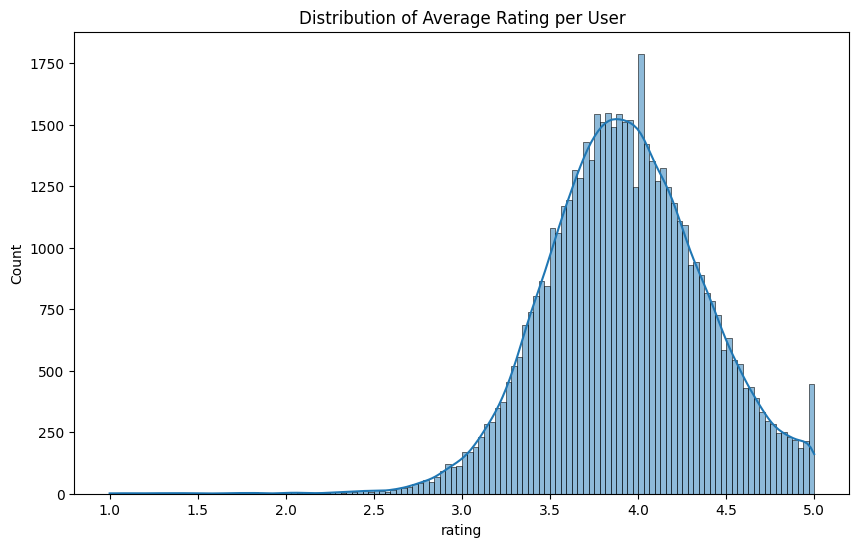

In [18]:
user_avg_rating = ratings_df.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(user_avg_rating, kde=True, palette='viridis')
plt.title('Distribution of Average Rating per User')
plt.show()

13. How many ratings does a book usually get?

<ipython-input-19-3ac1fe4ca7eb>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(book_rating_count, kde=True, palette='viridis')


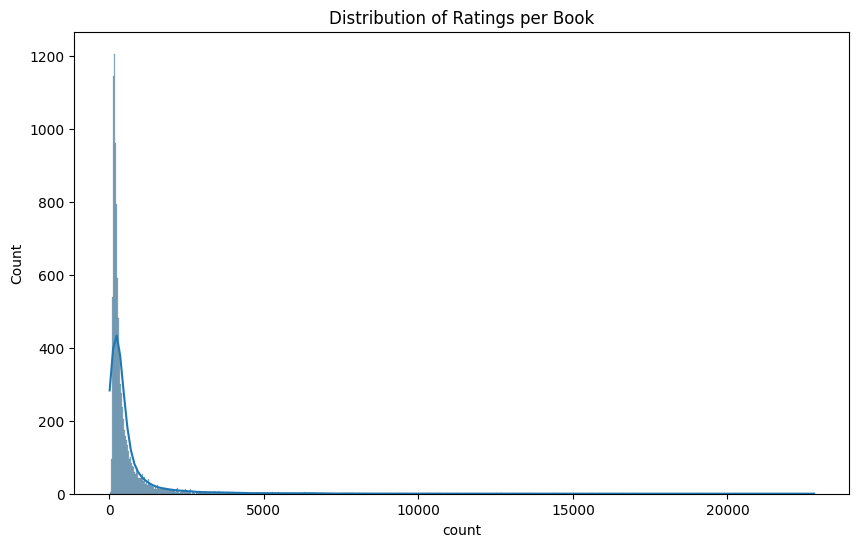

In [19]:
book_rating_count = ratings_df['book_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(book_rating_count, kde=True, palette='viridis')
plt.title('Distribution of Ratings per Book')
plt.show()

14. How many ratings does a user usually give?

<ipython-input-20-191ff6c1b8af>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(user_rating_count, kde=True, palette='viridis')


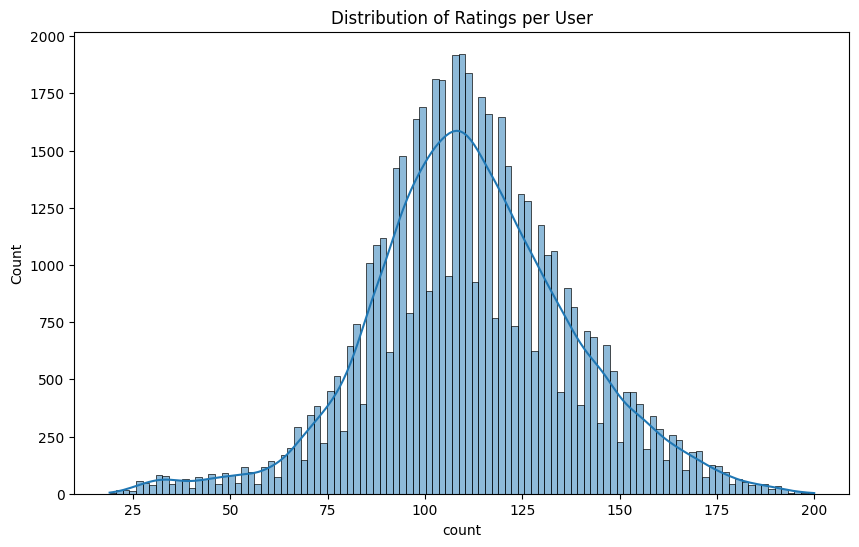

In [20]:
user_rating_count = ratings_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_count, kde=True, palette='viridis')
plt.title('Distribution of Ratings per User')
plt.show()

15. Does the ratings count affect average rating?

<ipython-input-21-abd16e689187>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=book_rating_count, y=book_avg_rating, palette='viridis')


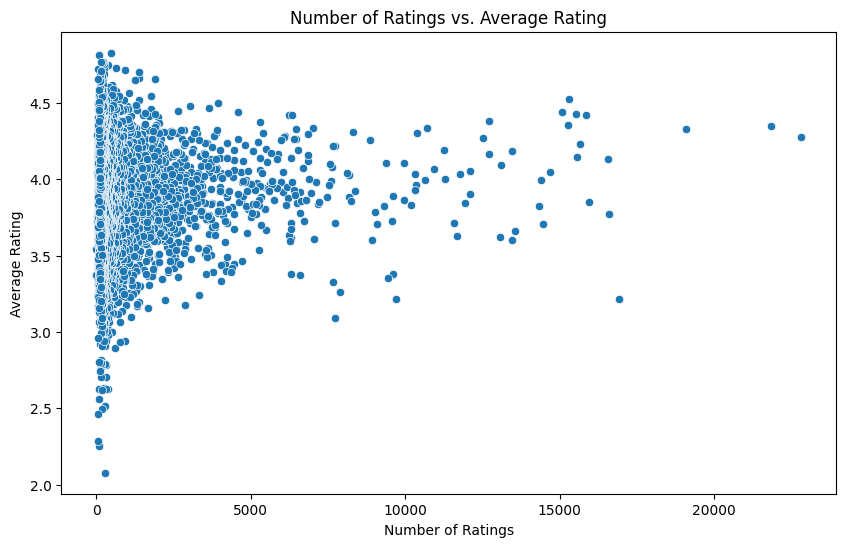

In [21]:
book_avg_rating = ratings_df.groupby('book_id')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=book_rating_count, y=book_avg_rating, palette='viridis')
plt.title('Number of Ratings vs. Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

16. Which book has the highest rating and which book has the most ratings?

In [22]:
highest_rated_book = book_avg_rating.idxmax()
most_rated_book = book_rating_count.idxmax()
print(f"Book with the highest rating: {highest_rated_book}")
print(f"Book with the most ratings: {most_rated_book}")

Book with the highest rating: 3628
Book with the most ratings: 1


17. How is the relationship between the number of ratings and the average rating?

<ipython-input-23-0cfaea642864>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=book_rating_count, y=book_avg_rating, palette='viridis')


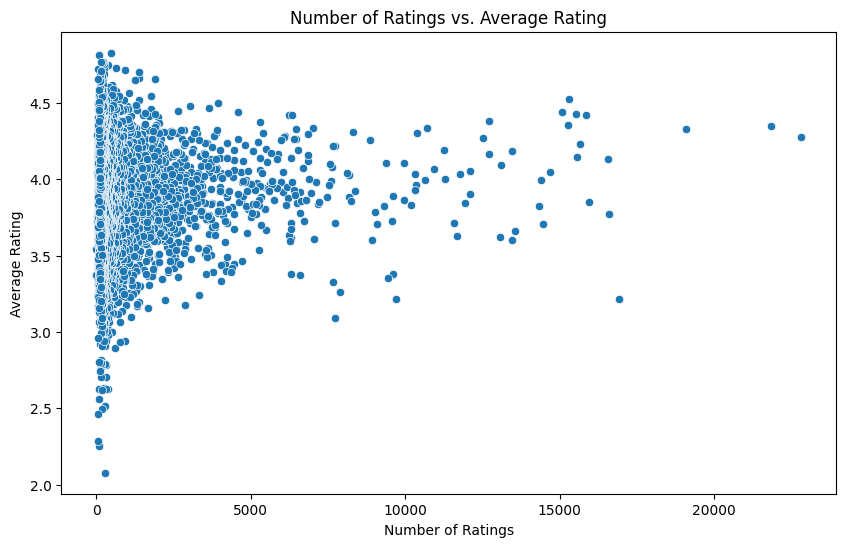

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=book_rating_count, y=book_avg_rating, palette='viridis')
plt.title('Number of Ratings vs. Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

18. Who is the author with most books?

In [25]:
author_book_count = books_enriched_df['authors'].value_counts()
most_books_author = author_book_count.idxmax()
print(f"Author with most books: {most_books_author}")


Author with most books: ['Stephen King']


19. Who is the most popular author?

In [28]:
author_rating_count = ratings_df.merge(books_enriched_df, on='book_id')['authors'].value_counts()
most_popular_author = author_rating_count.idxmax()
print(f"Most popular author: {most_popular_author}")

Most popular author: ['J.K. Rowling', 'Mary GrandPré']


20. Who is the author that has good ratings book?

In [29]:
author_avg_rating = ratings_df.merge(books_enriched_df, on='book_id').groupby('authors')['rating'].mean()
best_rated_author = author_avg_rating.idxmax()
print(f"Author with best-rated books: {best_rated_author}")

Author with best-rated books: ['Anonymous', 'Lane T. Dennis', 'Wayne A. Grudem']


21. Relationship between the number of pages and the year the book was published

<ipython-input-31-dd742616f04b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='original_publication_year', y='pages', data=books_enriched_df, palette='viridis')


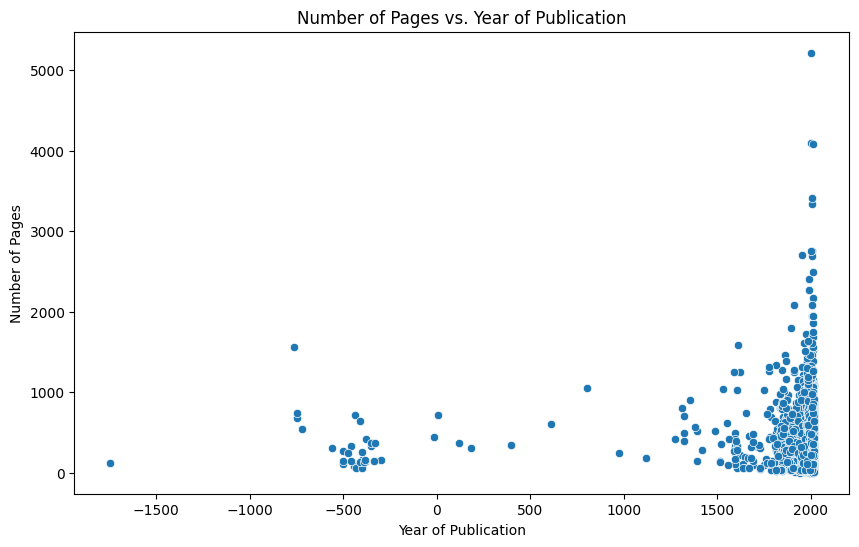

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_publication_year', y='pages', data=books_enriched_df, palette='viridis')
plt.title('Number of Pages vs. Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')
plt.show()

22. Dominant Genre in the dataset

In [33]:
genre_count = books_enriched_df['genres'].value_counts()
dominant_genre = genre_count.idxmax()
print(f"Dominant genre: {dominant_genre}")

Dominant genre: ['fantasy', 'fiction']
